In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#import graph
from process_data import process,split_x_y,normalize_data
from sklearn.model_selection import train_test_split
from rnalysis import filtering

### Data

In [3]:
data=process('all_data.csv')

In [9]:
102**2

10404

In [3]:
data_normalized=normalize_data(data,0)

In [4]:
data.shape

(491, 53967)

In [4]:
gene_expression_normalized=data_normalized.describe()

In [5]:
gene_expression=data.describe()

In [38]:
gene_expression_normalized

,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,...,ENSG00000244656,ENSG00000263760,ENSG00000264728,ENSG00000238667,ENSG00000238477,ENSG00000271726,ENSG00000215616,ENSG00000265557,ENSG00000238643,MRD Response
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.002037,0.002037,0.002037,0.002037,0.002037,0.002037,0.002037,0.002037,0.002037,0.002037,...,0.002037,0.002037,0.002037,0.002037,0.002037,0.002037,0.002037,0.002037,0.002037,0.478615
std,0.004189,0.001197,0.015051,0.022465,0.037800,0.045129,0.003257,0.002566,0.003733,0.003958,...,0.033791,0.008517,0.006893,0.005735,0.010382,0.020763,0.032339,0.009393,0.034070,0.500052
min,0.000000,0.000378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000009,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.001186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000474,0.000177,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.001738,0.000000,0.000000,0.000000,0.000000,0.001204,0.001232,0.000573,0.000660,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.002573,0.002552,0.000000,0.000000,0.000000,0.000000,0.002692,0.002698,0.002158,0.002100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.047753,0.009938,0.255377,0.438382,0.833313,1.000000,0.026340,0.020159,0.042648,0.049011,...,0.675391,0.093325,0.073398,0.062097,0.123344,0.295235,0.585118,0.121308,0.688142,1.000000


In [6]:
to_filter_genes=list(gene_expression_normalized.drop(['MRD Response'],axis=1).T[gene_expression_normalized.drop(['MRD Response'],axis=1).T['std']<0.01].index)

In [7]:
filtered_data=data_normalized.drop(to_filter_genes,axis=1)

In [8]:
X,y=split_x_y(filtered_data)

In [16]:
d = filtered_data.shape[1]-1    # Dimensionality.
n = filtered_data.shape[0]  # Number of samples.
c = 2      # Number of feature communities

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)


### Graph

In [10]:
dist, idx = graph.distance_scipy_spatial(X_train.T, k=7000, metric='euclidean')

In [11]:
A = graph.adjacency(dist, idx).astype(np.float32)

16183
[    0     0     0 ... 16182 16182 16182]


In [14]:
A.shape

(16183, 16183)

d = |V| = 16183, k|V| < |E| = 173654364


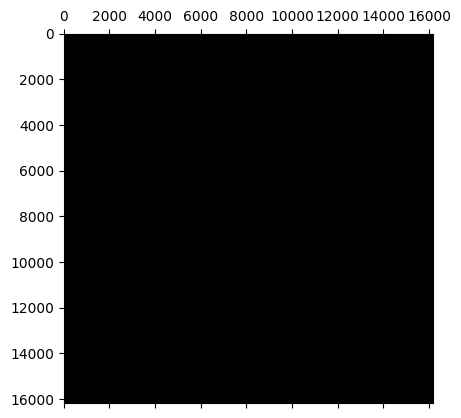

In [17]:
assert A.shape == (d, d)
print('d = |V| = {}, k|V| < |E| = {}'.format(d, A.nnz))
plt.spy(A, markersize=2, color='black')